Let's start by importing the dataset

In [80]:
mydata = read.csv("fitbit_cleaned.csv",stringsAsFactors = FALSE)

In [81]:
head(mydata)

X,Date,Calories,Steps,Distance,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
0,08-05-2015,1.934,905,0.65,0,1.355,46,0,0,168
1,09-05-2015,3.631,18925,14.11,4,611.000,316,61,60,2248
2,10-05-2015,3.204,14228,10.57,1,602.000,226,14,77,1719
3,11-05-2015,2.673,6756,5.02,8,749.000,190,23,4,962
4,12-05-2015,2.495,5020,3.73,1,876.000,171,0,0,736
5,13-05-2015,2.760,7790,5.79,15,726.000,172,34,18,1094


Removing the first two columns as they do not serve any purpose

In [82]:
mydata = mydata[c(-1,-2)]

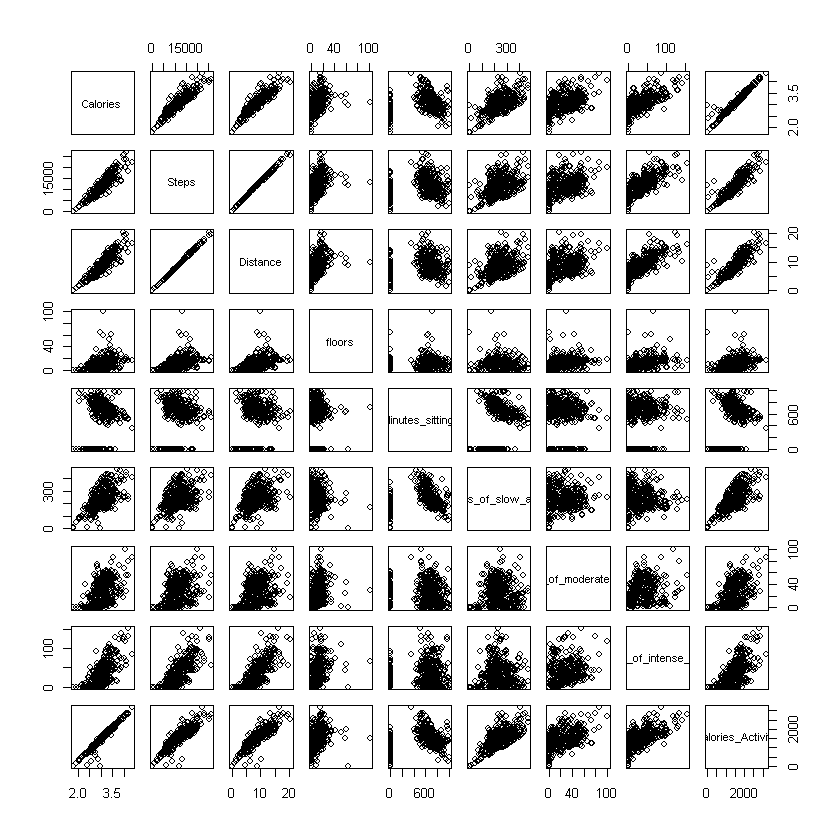

In [83]:
pairs(mydata)

Pair plot tells us about the corelation between variables.

Some of the strong corelations are - 

Calories - Steps, Steps - distance, calories - calories_activity and so on

This says that there would be an issue of <span style="color:red">Multicolinearity</span>

## Purpose

Predict <span style="color:red">Calories_activity</span> using Machine learning algorithms

## Possible models

To deal with the issue of issue of multicolinearity, we can use two of the below methods 

1. <span style="color:green">Linear regression with regularization</span> - Lasso, Ridge


2. <span style="color:blue">Principal component regression</span> (PCR)

## PCR

Let's start with PCA to see the amount of Variance explained by the components

In [84]:
mydata.pr <- prcomp(mydata[c(1:8)], center = TRUE, scale = TRUE)
summary(mydata.pr)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0394 1.1623 0.9649 0.87127 0.79423 0.36782 0.18080
Proportion of Variance 0.5199 0.1689 0.1164 0.09489 0.07885 0.01691 0.00409
Cumulative Proportion  0.5199 0.6888 0.8052 0.90005 0.97890 0.99581 0.99990
                           PC8
Standard deviation     0.02834
Proportion of Variance 0.00010
Cumulative Proportion  1.00000

The first 4 principal components explain 90% of the variance

Also the first 5 PC's explain 98% of the variance

In [85]:
nrow(mydata)

[1] 367

In [86]:
nrow(mydata.pr$x)

[1] 367

We will use the top 4 in this case

In [109]:
mydata.pr$x[,1:4]

PC1,PC2,PC3,PC4
-5.23956541,1.42430797,1.07252192,0.21694813
3.02965490,-0.64239488,0.30947517,-1.39569707
0.88797426,-0.31598667,0.47828883,0.70201008
-1.97214256,-0.13884412,-0.93391523,-0.16890575
-3.02331511,-0.71520248,-1.08081970,0.66788909
-1.24722236,0.59734027,-1.06867512,-0.29017560
-2.40551675,-0.80952758,-0.82323998,-0.00881238
-1.44940474,-0.40023632,-0.86598060,0.69126262
5.04564641,1.62734464,-0.11710254,-2.24567997
0.33995621,0.99100858,-0.54333707,-0.64617913


Bind the Calories_Activity column

In [88]:
binded_data <- cbind(mydata.pr$x[,1:4],mydata$Calories_Activity)

In [89]:
head(binded_data)

PC1,PC2,PC3,PC4,
-5.2395654,1.4243080,1.0725219,0.2169481,168
3.0296549,-0.6423949,0.3094752,-1.3956971,2248
0.8879743,-0.3159867,0.4782888,0.7020101,1719
-1.9721426,-0.1388441,-0.9339152,-0.1689058,962
-3.0233151,-0.7152025,-1.0808197,0.6678891,736
-1.2472224,0.5973403,-1.0686751,-0.2901756,1094


In [90]:
(colnames(binded_data))

[1] "PC1" "PC2" "PC3" "PC4" ""

Since colname 5 is empty, let's give it a name

In [92]:
colnames(binded_data)[5] <- 'Calories_Activity'

Convert to a dataframe for linear regression

In [93]:
binded_data_dataframe <- as.data.frame(binded_data)

In [94]:
linearMod <- lm(Calories_Activity ~ ., data=binded_data_dataframe)

In [95]:
summary(linearMod)


Call:
lm(formula = Calories_Activity ~ ., data = binded_data_dataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-719.45  -35.01    6.79   36.70  468.27 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1484.847      5.408 274.577  < 2e-16 ***
PC1          233.859      2.655  88.075  < 2e-16 ***
PC2         -122.751      4.659 -26.347  < 2e-16 ***
PC3           37.928      5.612   6.759 5.59e-11 ***
PC4          -80.568      6.215 -12.963  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 103.6 on 362 degrees of freedom
Multiple R-squared:  0.9599,	Adjusted R-squared:  0.9595 
F-statistic:  2166 on 4 and 362 DF,  p-value: < 2.2e-16


With just <span style="color:red">4</span> components, we received a score of 0.96.

Now let's try removing the outliers and seeing if it has any effect

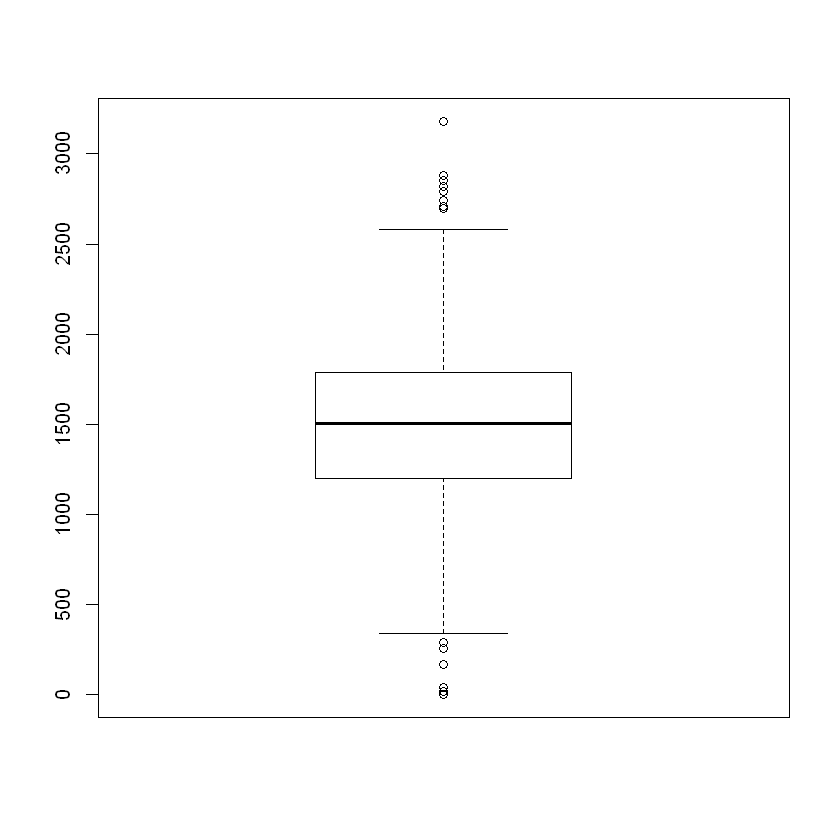

In [110]:
boxplot(mydata$Calories_Activity)

Filtering out the rows where calories_activity are outliers

In [105]:
new.binded_data_dataframe <- binded_data_dataframe[ which( binded_data_dataframe$Calories_Activity > 250 | binded_data_dataframe$Calories_Activity < 2600) , ]

Running the model again

In [106]:
linearMod_new <- lm(Calories_Activity ~ ., data=new.binded_data_dataframe)

In [107]:
summary(linearMod_new)


Call:
lm(formula = Calories_Activity ~ ., data = new.binded_data_dataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-719.45  -35.01    6.79   36.70  468.27 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1484.847      5.408 274.577  < 2e-16 ***
PC1          233.859      2.655  88.075  < 2e-16 ***
PC2         -122.751      4.659 -26.347  < 2e-16 ***
PC3           37.928      5.612   6.759 5.59e-11 ***
PC4          -80.568      6.215 -12.963  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 103.6 on 362 degrees of freedom
Multiple R-squared:  0.9599,	Adjusted R-squared:  0.9595 
F-statistic:  2166 on 4 and 362 DF,  p-value: < 2.2e-16


Didn't have any effect this time. Maybe we will be lucky next time

In [96]:
mydata1 = read.csv("fitbit_cleaned.csv",stringsAsFactors = FALSE)
mydata1 = mydata1[c(-1,-2)]

In [97]:
linearMod1 <- lm(Calories_Activity ~ ., data=mydata1)

In [98]:
summary(linearMod1)


Call:
lm(formula = Calories_Activity ~ ., data = mydata1)

Residuals:
     Min       1Q   Median       3Q      Max 
-277.258  -24.915   -1.433   27.850  126.843 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -6.365e+02  4.923e+01 -12.930  < 2e-16 ***
Calories                      3.150e+02  2.578e+01  12.220  < 2e-16 ***
Steps                        -9.190e-02  1.312e-02  -7.002 1.25e-11 ***
Distance                      1.221e+02  1.686e+01   7.238 2.80e-12 ***
floors                       -1.669e-01  2.682e-01  -0.622    0.534    
Minutes_sitting              -8.551e-03  8.246e-03  -1.037    0.300    
Minutes_of_slow_activity      3.398e+00  7.351e-02  46.222  < 2e-16 ***
Minutes_of_moderate_activity  5.085e+00  1.769e-01  28.744  < 2e-16 ***
Minutes_of_intense_activity   6.758e+00  1.996e-01  33.858  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.53 on 

## Result

Even though the results of <span style="color:red">PCR</span> were a bit off than normal LR, it did take less variables and would be faster in execution.

This could also be useful when working with <span style="color:red">10</span> gbs of data which could have significant variables

## Improvements

1. Using Regularization - Ridge, Lasso

2. Feature engineering to generate new variables